In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [ ]:
list_path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/00_experiments_lists/"
exp_list = pd.read_csv(list_path + "20241203_chlamy_bode_list_Fm_ok.csv", sep=";", decimal=",")


exp_list

NameError: name 'pd' is not defined

In [26]:
exp_list.F_max[0]

0.99

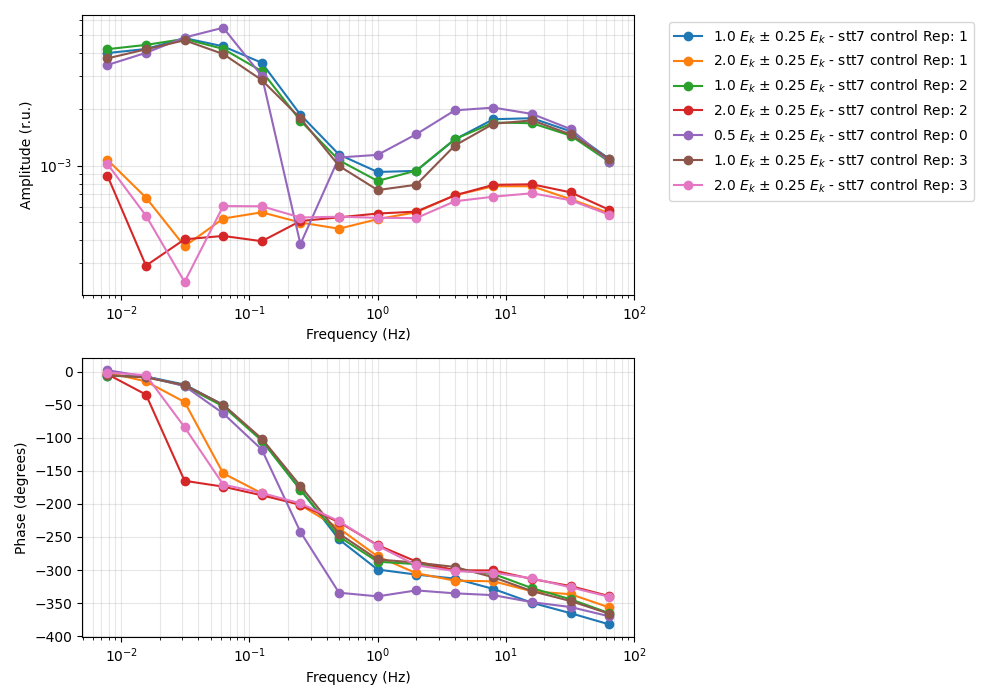

In [30]:
names = exp_list[exp_list["Offset_Ek"]>=0]["Name"].to_list()

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
A_input = []
norm_Fmax = []
labels = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    i_list = exp_list[exp_list["Name"] == name].index[0]
    A_input.append(exp_list.iloc[i_list]["Amp"])
    norm_Fmax.append(exp_list.iloc[i_list]["F_max"])
    label = f"{exp_list.iloc[i_list]['Offset_Ek']} $E_k$ ± {exp_list.iloc[i_list]['Amp_Ek']} $E_k$ - {exp_list.iloc[i_list]['Strain']} {exp_list.iloc[i_list]['Cond']} Rep: {exp_list.iloc[i_list]['Replicate']}"
    labels.append(label)

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

for i, result in enumerate(results):
    
    harmonics = result
    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])
    phase = harmonics['P_0'] - 180 - ref_phase
    phase = np.rad2deg(np.unwrap(np.deg2rad(phase[::-1])))[::-1]
    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

# ax[1].set_ylim(-60, 15)
# ax[1].set_yticks(np.arange(-60, 45 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig(list_path + "compare.png", dpi = 300)

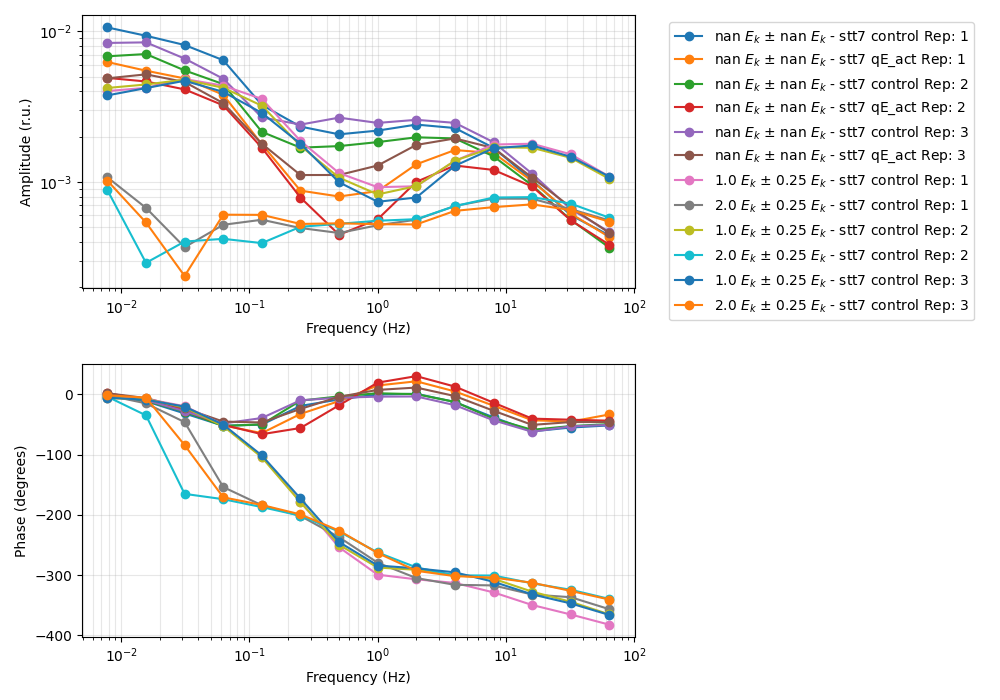

In [ ]:
names = exp_list[exp_list["Replicate"]>0]["Name"].to_list()

ref_phase = [-17.41713528, -11.62669205,  -2.65725325,  -7.51706631,
       -13.81628302, -15.4937856 , -24.9690497 , -11.69197657,
        -7.08698514,  -3.25738282,   5.83062099,   3.30577614,
        -6.45168624,  -6.61327604]
results = []
A_input = []
norm_Fmax = []
labels = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/harmonics.csv"
    results.append(pd.read_csv(path, index_col= False, sep=";"))
    i_list = exp_list[exp_list["Name"] == name].index[0]
    A_input.append(exp_list.iloc[i_list]["Amp"])
    norm_Fmax.append(exp_list.iloc[i_list]["F_max"])
    label = f"{exp_list.iloc[i_list]['Offset_Ek']} $E_k$ ± {exp_list.iloc[i_list]['Amp_Ek']} $E_k$ - {exp_list.iloc[i_list]['Strain']} {exp_list.iloc[i_list]['Cond']} Rep: {exp_list.iloc[i_list]['Replicate']}"
    labels.append(label)

fig, ax = plt.subplots(2, 1, figsize = (10, 7))

for i, result in enumerate(results):
    
    harmonics = result
    ax[0].loglog(harmonics['f_input'], harmonics['A_0']/(norm_Fmax[i] * A_input[i]), '-o', label = labels[i])
    phase = harmonics['P_0'] - 180 - ref_phase
    phase = np.rad2deg(np.unwrap(np.deg2rad(phase[::-1])))[::-1]
    ax[1].semilogx(harmonics['f_input'], phase, '-o', label = labels[i])


ax[0].set_xlabel("Frequency (Hz)")
ax[1].set_xlabel("Frequency (Hz)")

ax[0].grid(which ="both", alpha = 0.3)
ax[1].grid(which = "both", alpha = 0.3)

# ax[1].set_ylim(-60, 15)
# ax[1].set_yticks(np.arange(-60, 45 + 15, 15))

ax[0].set_ylabel("Amplitude (r.u.)")
ax[1].set_ylabel("Phase (degrees)")

ax[0].legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')

fig.tight_layout()

fig.savefig(list_path + "compare.png", dpi = 300)